<a href="https://colab.research.google.com/github/P1oruN7/UrbanPyCourse/blob/main/%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22%D0%9F%D0%B8%D1%82%D0%BE%D0%BD_%D0%B4%D0%BB%D1%8F_%D1%83%D1%80%D0%B1%D0%B0%D0%BD%D0%B8%D1%81%D1%82%D0%BE%D0%B2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговый проект. Улицы. Объекты культурного наследия.

In [ ]:
# TODO собрать установку всех необходимых модулей в одном месте
!pip install osmnx
!pip install geopandas
!pip install mapclassify

In [2]:
# TODO собрать импорты всех модулей в одном месте
import osmnx as ox
import geopandas as gpd
import mapclassify

In [3]:
TILES = "CartoDB positron"  # Название подложки для карт

# TODO указать любой район Санкт-Петербург из OSM https://wiki.openstreetmap.org/wiki/RU:%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3/%D0%A0%D0%B0%D0%B9%D0%BE%D0%BD%D1%8B
TERRITORY_NAME = ["Васильеостровский район, Санкт-Петербург", "Красногвардейский район, Санкт Петербург"]  # название территории для которой будут строиться слои

# TODO указать ссылку на файл из вашего github репозитория, которая начинается с https://raw.githubusercontent.com/
KGIOP_FILE_URL = "https://raw.githubusercontent.com/P1oruN7/UrbanPyCourse/main/geojson_layers/kgiop_objects.geojson"  # ссылка на слой с объектами культурного наследия
STREETS_FILE_URL = "https://raw.githubusercontent.com/P1oruN7/UrbanPyCourse/main/geojson_layers/streets.geojson"  # ссылка на слой с улицами

## Территория

### Загрузка территории из OSM (Extract)

In [4]:
# TODO загрузить geodataframe с геометрией для территории TERRITORY_NAME
territory = ox.geocode_to_gdf(TERRITORY_NAME)
territory.explore(color="magenta", tiles="CartoDB positron")

## Улицы

### Загрузка файла с улицами (Extract)

In [5]:
# TODO отфильтровать улицы по маске геометрии территории полученной ранее
streets = gpd.read_file(STREETS_FILE_URL, mask=territory)
streets.explore(tiles="CartoDB positron", color="magenta")
#streets # здесь выводит, что выбрано 2166 строк

### Обработка данных с улицами (Transform)

In [6]:
# TODO сгруппировать и объединить геометрии с одинаковыми названиями
streets = streets.dissolve(by="name")

""" Если погуглить, то на В.О. и в Красногвардейском районе есть в сумме 259 улиц, то есть дупликаты остались
Если просто выводить строки, то как минимум 4 и 5 это '1-я линия' и '1-я линия В.О.'
Править это только руками (или нейронками... 🤔). Делать этого не будем... """

streets  # Здесь выводит 329 строк


,geometry
name,
1-й Охтинский путепровод,"LINESTRING (3385032.231 8389412.855, 3385026.9..."
1-я Жерновская улица,"LINESTRING (3393354.687 8391674.447, 3393424.7..."
1-я Поперечная улица,"LINESTRING (3400575.014 8394720.248, 3400536.9..."
1-я линия,"LINESTRING (3400408.291 8394100.825, 3400263.2..."
1-я линия В.О.,"MULTILINESTRING ((3371228.480 8388213.098, 337..."
...,...
улица Химиков,"MULTILINESTRING ((3391832.939 8392062.738, 339..."
улица Челюскина,"LINESTRING (3361436.751 8386728.833, 3361263.5..."
улица Шевченко,"MULTILINESTRING ((3367088.419 8383856.438, 336..."


### Сохранение слоя с улицами (Load)

In [7]:
# TODO переименовать столбцы в русские названия, кроме столбца geometry
# поскольку у нас только name, что является индексом, и столбец geometry, то тут переименовывать нечего


# TODO для того чтобы переименовать индекс, нужно обратиться и нему и вызвать от него метод rename (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.rename.html)

"""
Указанным методом не получилось нормально переименовать :(

Поэтому погуглил как просто задать имя индексу, решил последовать первому ответу отсюда:

https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index
"""

streets.index.names = ["Улица"]
streets

,geometry
Улица,
1-й Охтинский путепровод,"LINESTRING (3385032.231 8389412.855, 3385026.9..."
1-я Жерновская улица,"LINESTRING (3393354.687 8391674.447, 3393424.7..."
1-я Поперечная улица,"LINESTRING (3400575.014 8394720.248, 3400536.9..."
1-я линия,"LINESTRING (3400408.291 8394100.825, 3400263.2..."
1-я линия В.О.,"MULTILINESTRING ((3371228.480 8388213.098, 337..."
...,...
улица Химиков,"MULTILINESTRING ((3391832.939 8392062.738, 339..."
улица Челюскина,"LINESTRING (3361436.751 8386728.833, 3361263.5..."
улица Шевченко,"MULTILINESTRING ((3367088.419 8383856.438, 336..."


In [8]:
# TODO сохранить слой в географической проекции в формате GeoJSON
streets.to_crs(4326).to_file('streets_VO_and_Krasnogvard.geojson', driver='GeoJSON')

# попробовал открыть в кеплере, всё хорошо

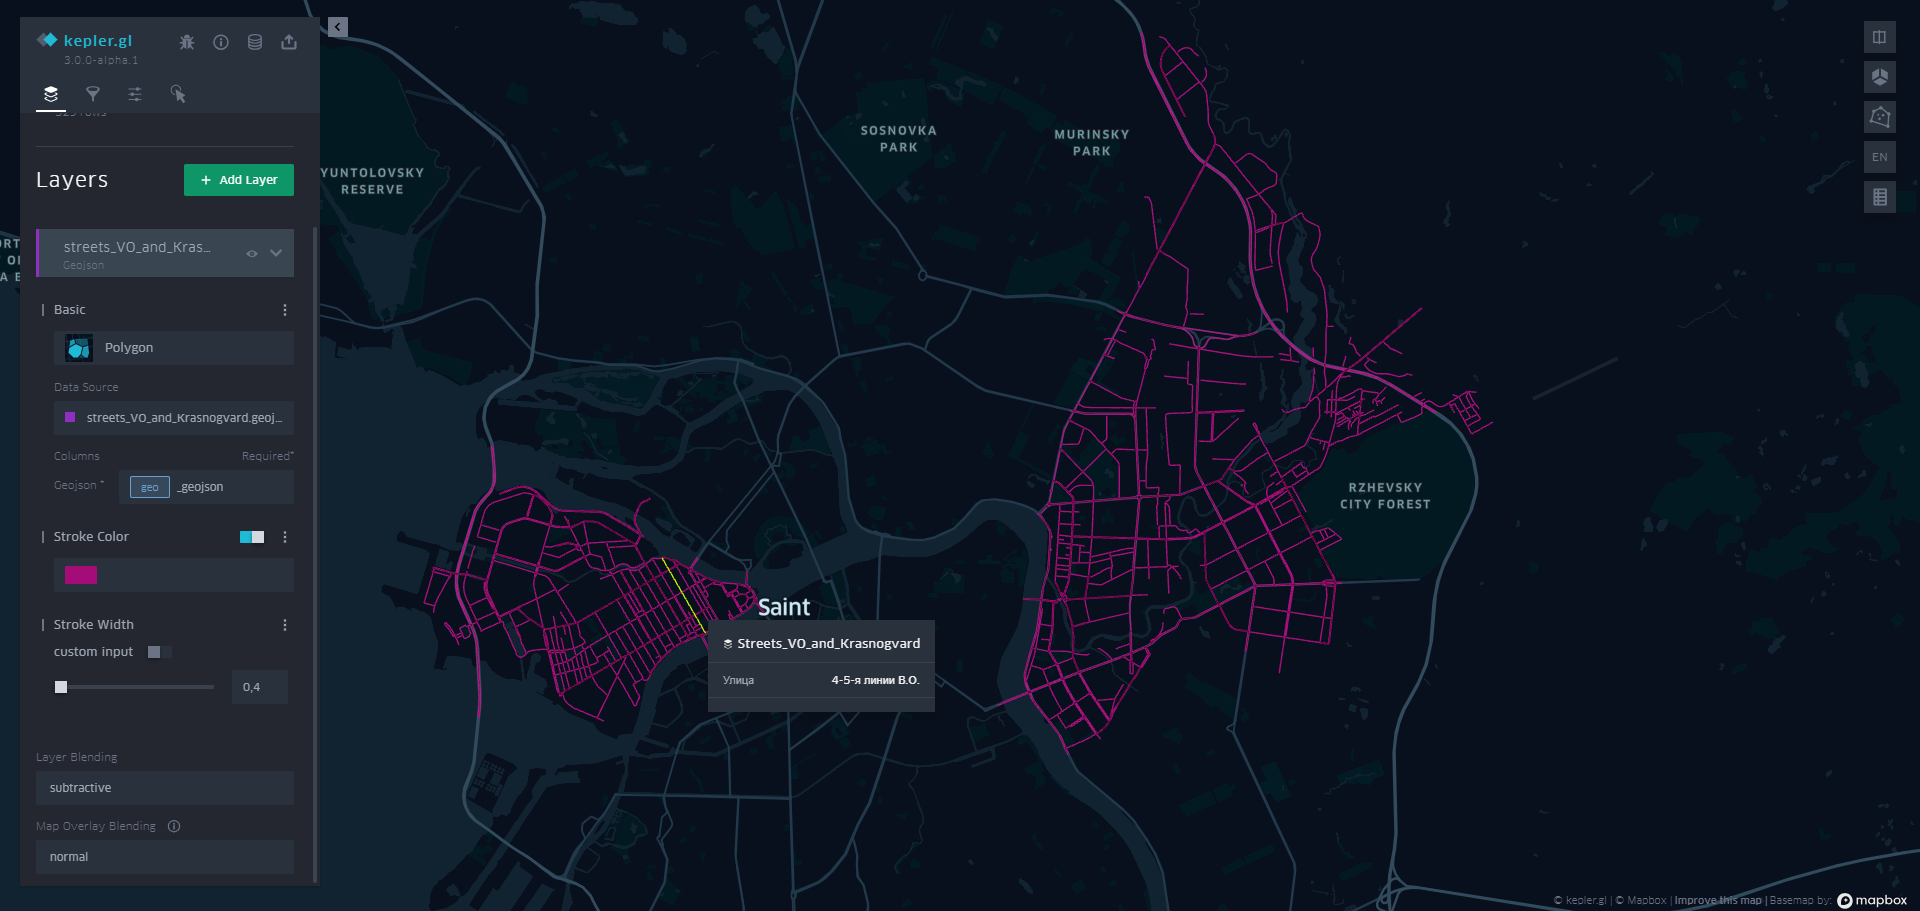

## Объекты культурного наследия

### Загрузка объектов культурного наследия (Extract)

In [16]:
# TODO отфильтровать улицы по маске геометрии территории полученной ранее
culture = gpd.read_file(KGIOP_FILE_URL, mask=territory)
culture.explore(tiles="CartoDB dark_matter", color="magenta")
culture

,id,ensemble_name,object_name,occurrence_time,object_location,historical_category,normative_act,object_type,geometry
0,1260,—,Дом А.Р. Гешвенда,1880-1881,"9-я линия В.О., 32",выявленный объект культурного наследия,Приказ председателя КГИОП № 15 от 20.02.2001,Памятник,POINT (3370436.885 8386572.161)
1,1021,Дом И.В. Голубина (И.И. Зайцевского),Флигель,нач. 19 в.; 1834,"Репина ул., 17",выявленный объект культурного наследия,Приказ председателя КГИОП № 15 от 20.02.2001,Памятник,POINT (3371907.580 8386491.569)
2,1015,—,Дом Г.И. Головкина (А.Н. Чичагова),1720-е - 1730-е; 1878,"1-я линия В.О., 10; Репина ул., 9",выявленный объект культурного наследия,Приказ председателя КГИОП № 15 от 20.02.2001,Памятник,POINT (3372020.006 8386392.023)
3,1016,—,Дом Леонтьева М.И. (Шуберта Ф.Ф.),"1722-1741, 1807-1809","1-я линия В.О., 12",объект культурного наследия федерального значения,Постановление Правительства РФ № 527 от 10.07....,Памятник,POINT (3372009.644 8386417.444)
4,1017,—,Дом А. Сверчкова (Кушелевой),1730-1740-е; 1815; 1863,"1-я линия В.О., 14, лит. А",объект культурного наследия регионального знач...,Распоряжение КГИОП № 139-р от 23.04.2021,Памятник,POINT (3372026.660 8386473.431)
...,...,...,...,...,...,...,...,...,...
895,9517,—,Главное здание Государственного оптического ин...,1947-1956,"Кадетская линия, 5, корп. 2, лит. В",объект культурного наследия регионального знач...,Распоряжение КГИОП от 01.07.2019 № 365-р,Памятник,POINT (3372240.630 8387172.627)
896,9605,Два жилых флигеля,Жилой флигель,кон. 18 в.; 1848,"4-я линия В.О., 39, лит. Б",объект культурного наследия регионального знач...,Распоряжение КГИОП от 05.08.2019 № 437-р,Памятник,POINT (3370714.885 8387675.618)
897,9606,Два жилых флигеля,Жилой флигель,кон. 18 в.; 1848,"4-я линия В.О., 39, лит. В",объект культурного наследия регионального знач...,Распоряжение КГИОП от 05.08.2019 № 437-р,Памятник,POINT (3370751.287 8387603.157)
898,9659,—,Участок сохранившегося культурного слоя с сохр...,—,северная часть квартала 11 М.Охты (Новочеркасс...,выявленный объект культурного наследия,Распоряжение КГИОП № 342-р от 21.10.2020,Памятник,POINT (3384950.867 8384360.913)


### Обработка объектов культурного наследия (Transform)

In [17]:
# делаем id индексом
culture = culture.dissolve(by=["id"])


# удаляем что нам не интересно
drop_columns = [
    "ensemble_name",
    "historical_category",
    "normative_act",
]
culture.drop(columns=drop_columns, inplace=True)

In [18]:
# TODO добавить два столбца lon и lat, в которых будут долгота и широта
culture["lon"] = culture.to_crs(3857).geometry.centroid.to_crs(4326).x
culture["lat"] = culture.to_crs(3857).geometry.centroid.to_crs(4326).y
culture

,geometry,object_name,occurrence_time,object_location,object_type,lon,lat
id,,,,,,,
1015,POINT (3372020.006 8386392.023),Дом Г.И. Головкина (А.Н. Чичагова),1720-е - 1730-е; 1878,"1-я линия В.О., 10; Репина ул., 9",Памятник,30.291371,59.940002
1016,POINT (3372009.644 8386417.444),Дом Леонтьева М.И. (Шуберта Ф.Ф.),"1722-1741, 1807-1809","1-я линия В.О., 12",Памятник,30.291278,59.940116
1017,POINT (3372026.660 8386473.431),Дом А. Сверчкова (Кушелевой),1730-1740-е; 1815; 1863,"1-я линия В.О., 14, лит. А",Памятник,30.291431,59.940368
1018,POINT (3372010.518 8386502.706),Дом М.П. Козловской (Ошеметковых). В 1796-1802...,1730-е (строительство двух домов); 1790-е (пер...,"1-я линия В.О., 16, лит. А",Памятник,30.291286,59.940500
1019,POINT (3371947.498 8386546.801),Дом И.В. Голубина (И.И. Зайцевского),1834-1878,"1-я линия В.О., 18; Большой пр. В.О., 2; Репин...",Ансамбль,30.290720,59.940698
...,...,...,...,...,...,...,...
9517,POINT (3372240.630 8387172.627),Главное здание Государственного оптического ин...,1947-1956,"Кадетская линия, 5, корп. 2, лит. В",Памятник,30.293353,59.943514
9605,POINT (3370714.885 8387675.618),Жилой флигель,кон. 18 в.; 1848,"4-я линия В.О., 39, лит. Б",Памятник,30.279647,59.945777
9606,POINT (3370751.287 8387603.157),Жилой флигель,кон. 18 в.; 1848,"4-я линия В.О., 39, лит. В",Памятник,30.279974,59.945451


### Сохранение слоя с объектами культурного наследия (Load)

In [19]:
# TODO переименовать столбцы в русские названия, кроме столбца geometry
rename_columns = {
    "object_name": "Название",
    "occurrence_time": "Когда появилось",
    "object_location": "Расположение",
    "object_type": "Тип",
    "lon": "Долгота",
    "lat": "Широта"
}
culture.rename(columns=rename_columns, inplace=True)
culture

,geometry,Название,Когда появилось,Расположение,Тип,Долгота,Широта
id,,,,,,,
1015,POINT (3372020.006 8386392.023),Дом Г.И. Головкина (А.Н. Чичагова),1720-е - 1730-е; 1878,"1-я линия В.О., 10; Репина ул., 9",Памятник,30.291371,59.940002
1016,POINT (3372009.644 8386417.444),Дом Леонтьева М.И. (Шуберта Ф.Ф.),"1722-1741, 1807-1809","1-я линия В.О., 12",Памятник,30.291278,59.940116
1017,POINT (3372026.660 8386473.431),Дом А. Сверчкова (Кушелевой),1730-1740-е; 1815; 1863,"1-я линия В.О., 14, лит. А",Памятник,30.291431,59.940368
1018,POINT (3372010.518 8386502.706),Дом М.П. Козловской (Ошеметковых). В 1796-1802...,1730-е (строительство двух домов); 1790-е (пер...,"1-я линия В.О., 16, лит. А",Памятник,30.291286,59.940500
1019,POINT (3371947.498 8386546.801),Дом И.В. Голубина (И.И. Зайцевского),1834-1878,"1-я линия В.О., 18; Большой пр. В.О., 2; Репин...",Ансамбль,30.290720,59.940698
...,...,...,...,...,...,...,...
9517,POINT (3372240.630 8387172.627),Главное здание Государственного оптического ин...,1947-1956,"Кадетская линия, 5, корп. 2, лит. В",Памятник,30.293353,59.943514
9605,POINT (3370714.885 8387675.618),Жилой флигель,кон. 18 в.; 1848,"4-я линия В.О., 39, лит. Б",Памятник,30.279647,59.945777
9606,POINT (3370751.287 8387603.157),Жилой флигель,кон. 18 в.; 1848,"4-я линия В.О., 39, лит. В",Памятник,30.279974,59.945451


In [21]:
# TODO сохранить слой в географической проекции в формате GeoJSON
culture.to_crs(4326).to_file('culture_VO_and_Krasnogvard.geojson', driver='GeoJSON')


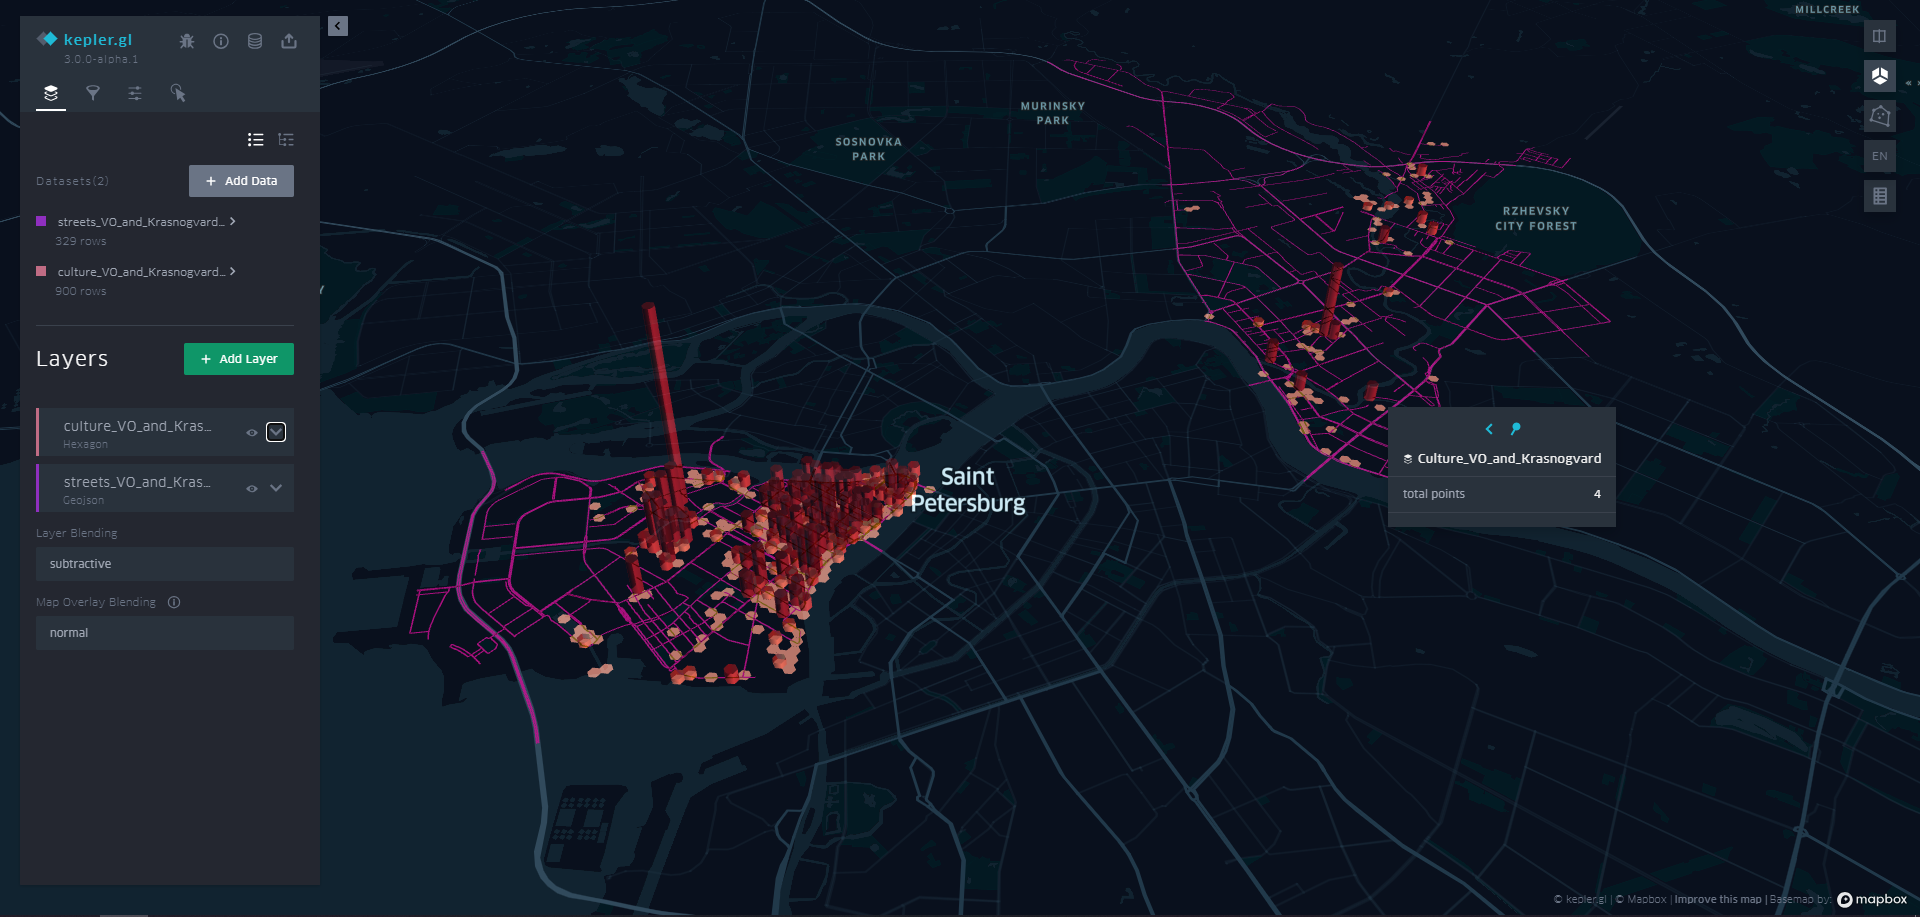